# 在双曲空间中细粒度实体类型
费德里科·洛佩兹

本杰明·海因策林

迈克尔·斯特鲁布

研究培训小组AIPHES

海德堡理论研究所

# 摘要
我们如何表示实体类型的大型类型清单中的层次信息?我们研究了双曲嵌入在共享向量空间中捕获上下文提及和目标类型之间的层次关系的能力。我们对两个数据集进行评估，并研究了创建大型分层实体类型清单的两种不同技术:从专家生成的本体和通过自动挖掘类型共存项。我们发现双曲模型在某些情况下比欧几里得模型有改进，但并非所有情况都是如此。我们的分析表明，这种几何结构的充分性取决于类型清单的粒度和推断层次关系的方式。

# 1介绍
实体类型根据实体的语义类对实体的文本提及进行分类。该任务从查找公司名称，到识别粗类，再到大约100种类型的细粒度清单，细粒度类型在关系提取和问题回答等应用程序中被证明是有益的。越来越多的库存的趋势在超精细和开放实体类型的数千类中达到了顶峰。

然而，大型类型清单对将实体类型转换为多标签分类任务的常见方法提出了挑战，因为随着类型数量的增加，利用类型间的相关性变得更加困难。自然的解决方案来处理大量的类型是组织层次结构从一般,粗糙的类型,如“人”顶部,更具体,类型,如“政治家,在中间,更具体,超细实体类型,如“外交官”底部(见图1)。由于这种层次结构,模型学习外交官能够传递这些知识等相关实体的政客。
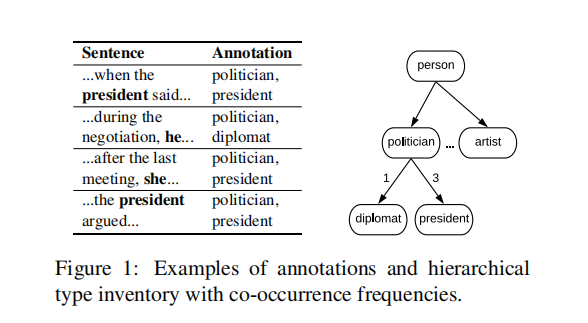
以前的工作通过构造一个层次感知损失或在一个联合欧氏嵌入空间中表示单词和类型来集成层次实体类型信息。注意到在欧几里得空间中嵌入任意层次结构是不可能的，Nickel和Kiela提出了双曲空间作为替代，并证明双曲嵌入可以精确地编码层次信息。直观地说(在第二节中有更详细的解释)，这是因为双曲空间中的距离随着远离原点呈指数级增长，就像层次结构中的元素数量随着深度呈指数级增长一样。

虽然双曲嵌入的内在优势已经得到了证实，但是到目前为止，它们在下游任务中的作用还不太清楚。我们认为这是由于两个困难造成的:首先，将双曲嵌入到神经模型中是非常重要的，因为训练涉及双曲空间的优化。其次，通常不清楚当前任务的最佳层次结构是什么。

在这项工作中，我们解决了这两个问题。使用超细粒度的实体类型作为一个测试床,我们首先展示如何将双曲嵌入到一个神经模型(第三节)。然后,我们检查的影响等级,比较双曲expert-generated本体的映射进行的一个大型的、自动生成一个(第四节)。我们的实验在两个不同的数据集显示(5节),双曲映射进行改善实体键入一些但不是所有情况下,表明它们的有用性依赖于类型目录及其层次结构。综上所述，我们的贡献如下:

1.我们开发了一个细粒度的实体类型模型，该模型在双曲空间中嵌入了实体类型和实体提及。

2.我们比较了两种不同的实体类型层次结构，一种由专家创建(WordNet)，另一种是自动生成的，并发现它们的适当性取决于数据集。

3.研究了在实体类型模型中，用双曲几何代替欧几里德几何的影响，发现双曲几何模型对超细类型的改进是显著的。


# 2背景:庞加莱映射
双曲几何研究具有常负曲率的非欧几里德空间。二维双曲空间可以建模为开放的单位盘，即所谓的庞加莱盘，其中单位圆表示无穷大，即，当一个点在双曲空间中趋于无穷时，它的范数在庞加莱盘模型中趋于1。在一般的n维情况下，圆盘模型变为庞加莱球= (x In Rn I ||x|| < 1}，其中||。||
为欧几里德范数。在庞加莱模型中，两点u^v E Bn之间的距离为:
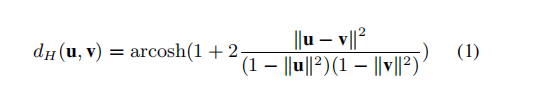

如果我们考虑原点O和两个点,x和y,朝着外面的磁盘,即| | x | |, y \ \ \ \ T 1血的距离(必y) + dH (O > y)。也就是说，x和y之间的路径收敛到原点。这种行为可以看作是(离散的)树状层次结构的连续模拟，其中两个兄弟节点之间的最短路径通过它们的共同祖先。

作为另一种直觉，注意点之间的双曲距离随着点远离中心呈指数增长。这反映了随着深度的增加，树中的节点数呈指数增长，因此双曲空间自然适合表示树和层次结构。

通过嵌入层次结构在庞加莱球项目层次结构的顶部附近的起源和较低的物品放在无穷(凭直觉,嵌入“垂直”结构),所以这项目分享父母的层次相互接近(嵌入“横向”结构),我们获得庞加莱映射进行。更正式地说，这意味着嵌入范数表示层次结构中的深度，而嵌入之间的距离表示相关项的相似性。

图2显示了将WordNet名词层次结构嵌入二维欧氏空间(左)和庞加莱磁盘(右)的结果。在双曲模型中，类型往往位于圆盘的边界附近。在这个区域，空间呈指数级增长，这使得相关的类型可以放在彼此附近，远离不相关的类型。模型中的实际距离不是图中所示的距离，而是由式1给出的距离。

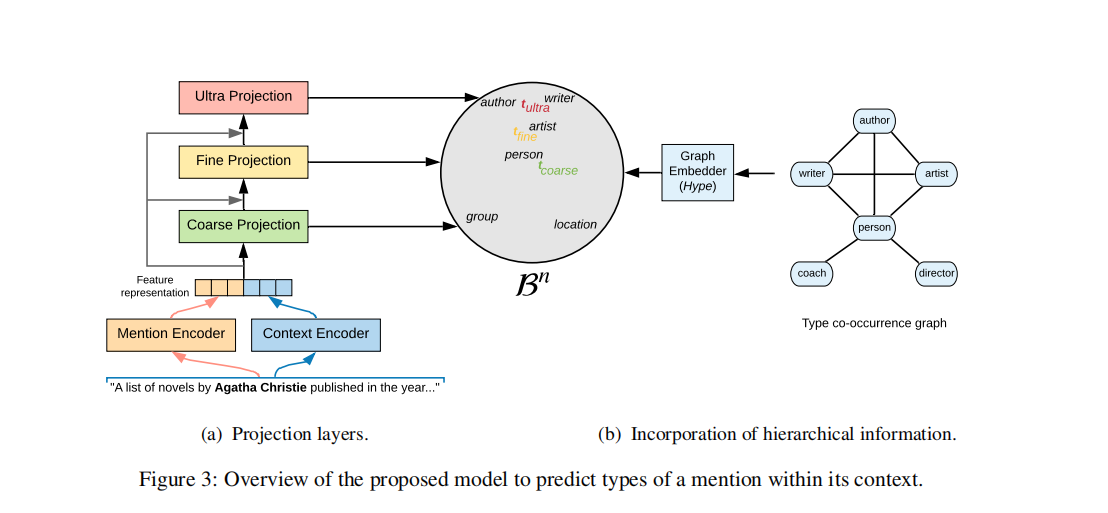

# 实体类型在双曲空间
## 3.1任务定义
我们考虑的任务是，给定一个包含一个提到m的实体的上下文句子c，预测正确的类型标签tm，该类型标签从一个包含10,000多个类型的类型清单T中描述m。提到的m可以是一个命名实体、一个名词性实体或一个代词。ground-truth类型集tm可能包含多个类型，这使得任务成为一个多标签分类问题。

## 3.2目标
我们的目的是分析双曲空间和欧几里德空间在对类型库中存在的层次信息建模时的效果，以完成细粒度实体类型的任务。由于双曲几何天生就具有对层次结构建模的能力，我们假设这种增强的表示将带来更好的性能。为了研究度量空间与层次结构之间的关系，我们提出了一个回归模型。我们学习了一个函数，该函数将一个提到的特性表示及其上下文映射到一个向量空间，从而使实例更接近其目标类型。

ground-truth类型集包含每个实例的不同数量的类型。然而，在我们的回归设置中，我们的目标是为所有实例预测固定数量的标签。这对我们提出的模型的性能施加了强大的上界。尽管如此，由于对超细数据集的最先进方法的严格精度低于40%，我们所执行的评估在定性方面仍然是有信息的，并且使我们能够在不同度量空间中嵌入层次结构方面获得更好的直觉。

## 3.3方法
给定给定m及其上下文c的编码特征表示形式，记作e(m, c) e Rn，我们的目标是学习一个映射函数f: Rn ts”，其中Sn是目标向量空间。我们打算近似地嵌入以前投射到空间中的类型标签tm。随后，我们将搜索嵌入表示的最近类型嵌入，以便分配与上下文中提到的对应的分类标签。图3显示了模型的概述。
数据集上的标签分布是多样化和细粒度的。每个实例都有三个粒度级别的注释，即粗粒度、细粒度和超细粒度，在开发和测试集中，平均每个项目有五个标签。这对只使用一个投影的学习和预测提出了一个具有挑战性的问题。作为一种解决方案，我们提出了三种不同的投影函数/ rough sen /fine和fuitra，每一种函数都用于预测特定粒度的标签。
我们假设，假设每个粒度的目标标签空间增加，那么投影的复杂性会随着粒度的增加而增加。受Sanh等人的启发，我们按照反映这些困难的层次方式安排了三个投影。粗投影任务设置在模型的底层，而更复杂(更精细)的交互设置在更高的层。通过对每一层的投影嵌入，我们的目标是在下一个投影中引入一个感应偏差，这将有助于引导它进入空间的正确区域。不过，我们使用快捷连接，以便顶层可以访问编码器层表示。

## 3.4提及和文本表示
为了对包含上述m的上下文c进行编码，我们采用了Choi等人基于Shimaoka等人的编码模式。我们将原始编码器的位置嵌入替换为字位置嵌入pi，以反映第i个字与所述实体之间的相对距离。这种修改导致了对注意层的偏见，即更少地关注提及，而更多地关注上下文。最后，我们应用一个标准的Bi-LSTM和一个自关注的编码器来获得上下文表示ce Rdc。
对于提到的表示，我们从字符级CNN获得特性，将它们与提到的手套词嵌入连接起来，并将它们与类似的自关注编码器组合在一起。上述表示形式表示为M e。最后的表示是通过提及和上下文[M;C] e Rdm +直流。

## 3.5投进球内
为了学习将我们的特征表示嵌入到目标空间中的投影函数，我们应用了Dhingra等人引入的再参数化技术的变体。重新参数化包括从e(m, c)计算方向向量r和范数大小a，如下:
其中可以是任意函数，其参数将在训练过程中得到优化，a是保证得到范数为e(0,1)的sigmoid函数。重新参数化嵌入定义为0 = Ar，位于Sn中。
通过使用这种简单的技术，可以保证嵌入在庞加莱球中。这避免了纠正梯度或利用黎曼- sgd的需要。相反，它允许在深度学习中使用任何优化方法，比如Adam。
我们将方向函数参数化:t Rn作为单层隐层的多层感知器(MLP)，使用校正线性单元(ReLU)作为非线性，并将其删除。我们不应用ReLU函数后的输出层，以允许负值作为分量的方向向量。对于范数大小函数:我们使用一个线性层。

## 3.6模型优化
我们的目标是在给定的向量空间Sn中找到嵌入实例表示更接近各自目标类型的投影函数fi。作为目标空间Sn，我们使用庞加莱球Bn与欧几里德单位球Rn进行比较。Bn和Rn都是度量空间，因此它们都有一个距离函数，即方程1中定义的双曲距离d和我们要最小化的欧式距离。此外，由于庞加莱模型是双曲空间的保角模型，即欧几里德向量与双曲向量夹角相等，所以我们也可以使用余弦距离。
我们建议最小化由每个度量空间定义的距离和余弦距离的组合来近似嵌入。虽然这不是一个正式的距离度量,因为它不满足cauchy - schwarz不等式,它提供了一个非常强烈的信号近似的目标嵌入会计主要概念建模表示法:亲缘,通过捕获的距离和方向的空间,和普遍性,通过嵌入的规范。
为了减少双曲距离导数的不稳定性，我们采用了Sala等人提出的方法，最小化了距离的平方，该距离的导数以Bn为单位是连续的。因此，在庞加莱模型中，我们将两点的距离最小化，定义为:

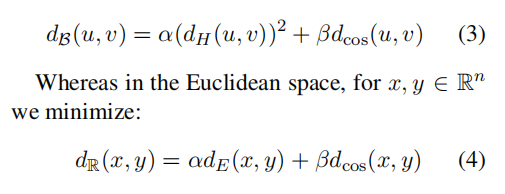

的hyperparametersα和β添加补偿余弦距离函数的有界的形象在[0,1]。

# 4分级类型清单
在本节中，我们研究了两种方法，用于推导给定类型清单的层次结构。首先，我们介绍了用于执行研究的数据集，因为我们利用了它们的一些特性来构建层次结构。